In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

from sklearn.datasets import load_boston

In [2]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


- всего 506 записей, пробелы данных отсутствуют
- все данные числовые, поэтому строки не нужно будет преобразовывать 

Проведем экплоративный анализ (проверим статистические показатели):

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


- почти все параметры не имеют нормального распределения
- много выбросов, особенно B, ZN, CRIM

посмотрим взаимную корреляцию признаков

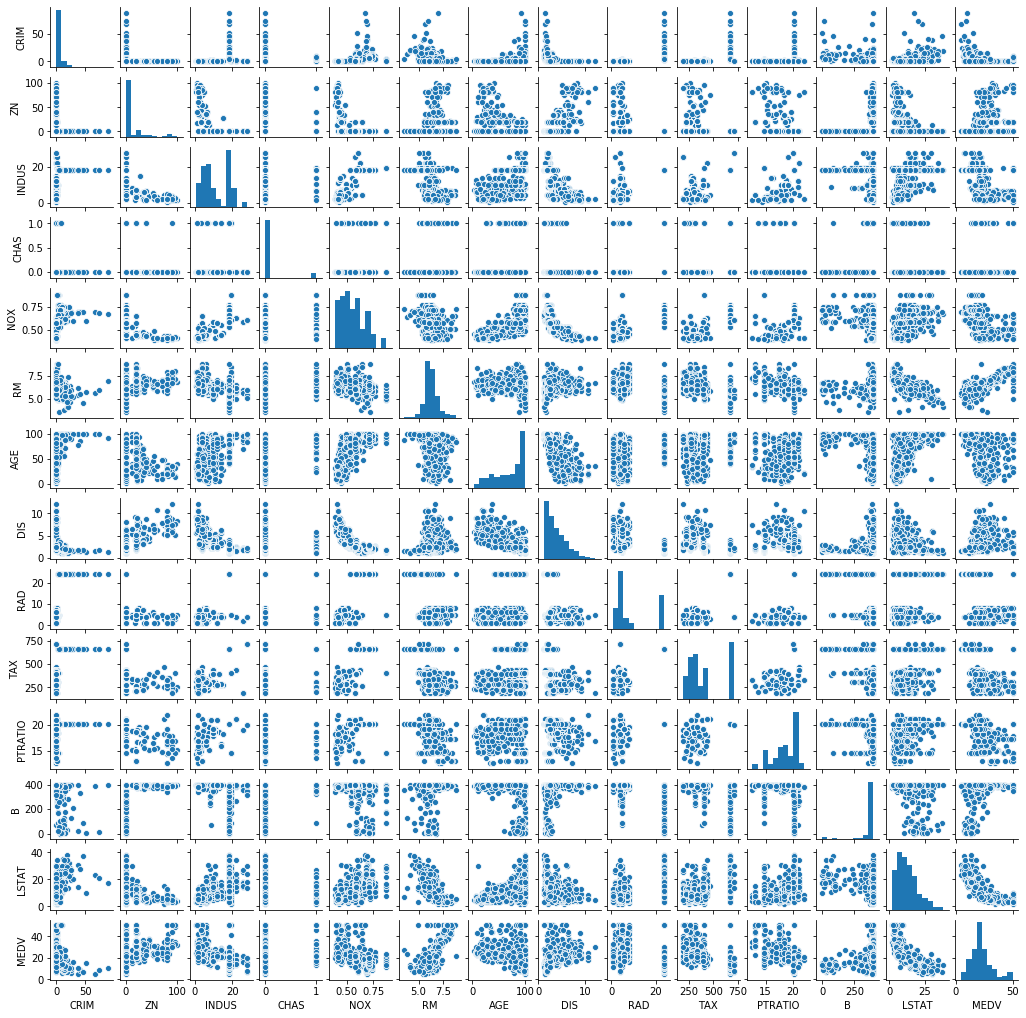

In [6]:
sns.pairplot(data, height=1)

Распределение целевой переменной похоже на нормальное

Цена (MEDV), похоже, прямо пропорциональна числу комнат (RM), а зависимость от процента людей с "низким статусом" (LSTAT) близка к линейной, но больше похожа на полиномиальную

Посмотрим тепловую карту для выявления четкой корреляции признаков

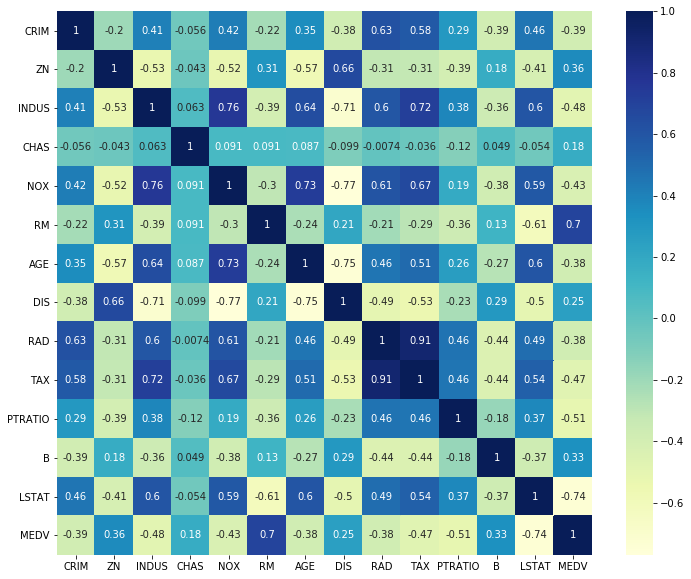

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')

Наибольшая корреляция для таргета: MEDV-RM; отрицательная: MEDV-LSTAT

Корреляция признаков: INDUS-TAX, NOX-AGE, RAD-TAX (близко к 1); отрицательная: INDUS-DIS, NOX-DIS, AGE-DIS

Попробуем применить простую линейную модель по признакам RM и LSTAT

In [9]:
X = data[['RM', 'LSTAT']]

y = data['MEDV']

model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6069792285352373

Сравним с моделью, учитывающую все признаки

In [10]:
X = data.drop(columns='MEDV')

y = data['MEDV']

model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.673382550640018

результат выше, когда учитываем все признаки

Попробуем вариант другой модели

In [11]:
from sklearn.tree import DecisionTreeRegressor

In [12]:
X = data.drop(columns='MEDV')
y = data['MEDV']

model = DecisionTreeRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6817670172645465

результат также чуть повыше

попробуем нормализовать признаки

In [14]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [17]:
model = DecisionTreeRegressor()

X_sc_train, X_sc_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=0)

model.fit(X_sc_train, y_train)
model.score(X_sc_test, y_test)

0.6725700574365548

стало даже чуть похуже

Построим набор моделей для значений random_state от 0 до 9

In [20]:
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = i)
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    print("{}: {}".format(i, model.score(X_test, y_test)))

0: 0.665883298757492
1: 0.8478008302352802
2: 0.6317114481743821
3: 0.7156297098729283
4: 0.6741520567268762
5: 0.6608128160793028
6: 0.636139777191808
7: 0.7009833025854253
8: 0.7677904114793883
9: 0.6377815456199264


лучше вариант при значении 8

Модель по всем признакам дает результаты +- аналогичные линейной, посмотрим, на какик признаки она в первую очередь опиралась

In [22]:
importances = dict(zip(model.feature_importances_, X.columns.values))
importances = sorted(importances.items())
importances

[(0.0006667920202104833, 'ZN'),
 (0.001037021901932657, 'CHAS'),
 (0.0013354985191959474, 'RAD'),
 (0.006075238730552842, 'B'),
 (0.006745959976603646, 'INDUS'),
 (0.01049430104162946, 'TAX'),
 (0.013943412286195292, 'PTRATIO'),
 (0.017660928108232995, 'AGE'),
 (0.026303818338566265, 'NOX'),
 (0.06193037549426852, 'CRIM'),
 (0.07705685092572813, 'DIS'),
 (0.21243514549380552, 'LSTAT'),
 (0.5643146571630783, 'RM')]

RM и LSTAT самые значимые, что соответствует выводу по графикам, зависимых друг от друга признаков среди наиболее значимых нет, эта последовательность важности признаков приоритетна. Затем идут 'DIS', 'CRIM', 'NOX'

In [23]:
X = data[['RM', 'LSTAT', 'DIS', 'CRIM', 'NOX']]

y = data['MEDV']

model = DecisionTreeRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6887580181751457

стало опять хуже

попробуем еще один вариант модели

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
X = data.drop(columns='MEDV')
y = data['MEDV']

model = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8253128032011584

видно значительно улучшение

Построим набор моделей для значений random_state от 0 до 9

In [27]:
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = i)
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    print("{}: {}".format(i, model.score(X_test, y_test)))

0: 0.8328979819132383
1: 0.9089778439646966
2: 0.8943526019501014
3: 0.8344252585887257
4: 0.8301950422648072
5: 0.8740810968526509
6: 0.872845058378525
7: 0.8223366926370731
8: 0.8395370115127949
9: 0.8357904472133194


лучше вариант при значении 1

попробуем исключить один из признаков

In [28]:
X = data.drop(columns=['MEDV', 'RAD'])
y = data['MEDV']

model = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8986789440952867

проверим, что будет выбирать rfecv

In [29]:
from sklearn.feature_selection import RFECV

In [31]:
X = data.drop(columns='MEDV')
y = data['MEDV']

model = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

rfecv = RFECV(model,step=1)
rfecv.fit(X_train, y_train)
rfecv.score(X_test, y_test)

dict(zip(X.columns.values, rfecv.support_))

{'CRIM': True,
 'ZN': False,
 'INDUS': True,
 'CHAS': True,
 'NOX': True,
 'RM': True,
 'AGE': True,
 'DIS': True,
 'RAD': True,
 'TAX': True,
 'PTRATIO': True,
 'B': True,
 'LSTAT': True}

неподходящими считается ZN

In [32]:
X = data.drop(columns=['MEDV', 'ZN'])
y = data['MEDV']

model = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.895277120098425

глобальных улучшений не получилось

Построим набор моделей для значений random_state от 0 до 9

In [33]:
for i in range(10):
    X = data.drop(columns=['MEDV', 'ZN'])
    y = data['MEDV']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = i)
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    print("{}: {}".format(i, model.score(X_test, y_test)))

0: 0.8308854375839807
1: 0.9044818421163272
2: 0.8908887080799314
3: 0.8395739814347415
4: 0.8336499594036753
5: 0.8839326343053213
6: 0.8681237040774911
7: 0.8231988976674843
8: 0.8391873276325749
9: 0.8383267101713558


лучше вариант при значении 1, но чуть хуже при наблоре всех признаков

лучший вариант получился

In [40]:
X = data.drop(columns='MEDV')
y = data['MEDV']

model = RandomForestRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9092025667896716